In [2]:
# 监督学习

In [3]:
import mglearn
X_all, y_all = mglearn.datasets.make_forge()

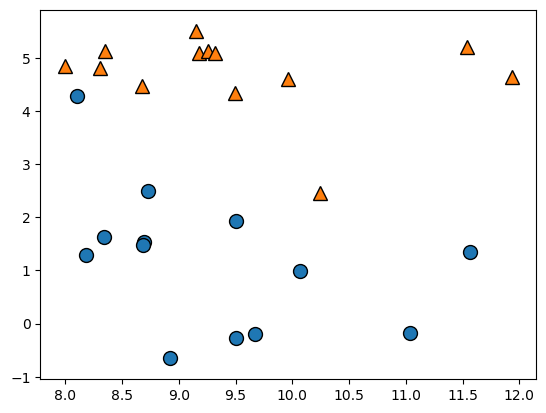

In [4]:
# 数据集绘制
mglearn.discrete_scatter(X_all[:,0], X_all[:, 1], y_all)

In [5]:
import mglearn as ml

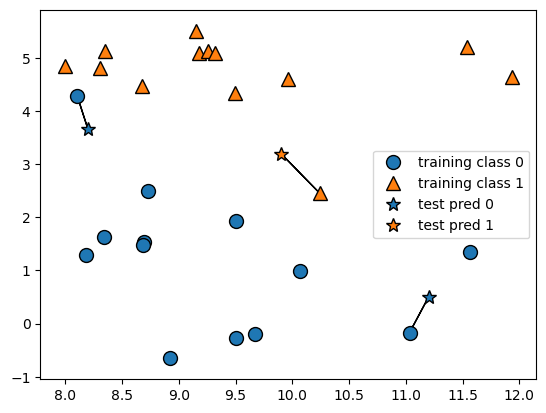

In [6]:
# KNN算法只考虑一个邻居
ml.plots.plot_knn_classification(n_neighbors=1)

In [7]:
# 使用KNN算法拟合forge数据库
# 导入分类器
from sklearn.neighbors import KNeighborsClassifier as KNN
# 使用参数实例化分类器设置邻居的个数为3
knn = KNN(n_neighbors=3)
# 将数据分为训练集和测试集合
import mglearn as ml
from sklearn.model_selection import train_test_split as tts
x_all, y_all = ml.datasets.make_forge()
x_train, x_test, y_tarin, y_test = tts(x_all, y_all, random_state=0)
# 将训练集用于拟合
knn.fit(x_train, y_tarin)
# 将测试集合用于评估
knn_score = knn.score(x_test, y_test)
print(knn_score)
# 对新样本进行预测
import numpy as np
knn.predict(np.array([[9.0, 2.0]]))
# 预测结果为第一类

0.8571428571428571


array([0])

In [8]:
ml.datasets.make_forge()

(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

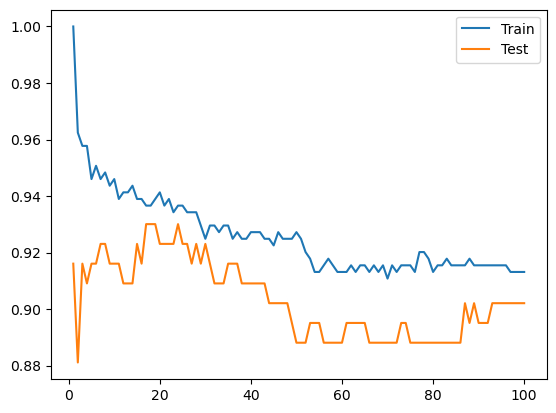

In [9]:
# 使用乳腺癌数据集展示训练集精度和泛化精度之间的关系
# 模型越拟合训练集 泛化的能力就越低 这就是过拟合的原因
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
# 导入数据
cancer = load_breast_cancer()
# 分割数据
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)
# 使用不同的参数对训练集进行拟合
neighbors = list(range(1, 101))
train_scores = []
test_scores = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    test_scores.append(knn.score(x_test, y_test))
    train_scores.append(knn.score(x_train, y_train))
# 数据可视化
import matplotlib.pyplot as plt
plt.plot(neighbors, train_scores, label="Train")
plt.plot(neighbors, test_scores, label="Test")
plt.legend()
    

In [10]:
# 线性模型

In [11]:
# 线性回归
# 根据训练集去寻找模型的最佳系数和最佳截距，使得预测值和真实值之间的均方误差最小
# 线性回归模型是没有参数的，所以是无法手动调整模型的复杂度的
# 复杂度和数据的特征数有关 特征数越多 模型越复杂


In [12]:
# 使用线性回归模型对wave数据进行拟合
from sklearn.linear_model import LinearRegression
from mglearn.datasets import make_wave
from sklearn.model_selection import train_test_split

In [13]:
x_all, y_all = make_wave(n_samples=100)
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, random_state=0)
lr = LinearRegression() # 没有参数
lr.fit(x_train, y_train) 
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)
print(f"训练集分数：{train_score}")
print(f"测试集分数：{test_score}")
# 训练集和测试集的分数都很低，说明模型是欠拟合的，
# 但是线性模型是不能饿调整参数的，我们需要更加复杂的模型

训练集分数：0.6055564372642456
测试集分数：0.621210114749764


In [14]:
# 使用岭回归算法去训练模型
from sklearn.linear_model import Ridge
rg = Ridge() # 有一个主要参数可以调整 alpha L2正则哈  alpha越大 约束越强 正则化程度越高 系数越接近于0 模型的复杂度越低
rg.fit(x_train, y_train)
train_score = rg.score(x_train, y_train)
test_score = rg.score(x_test, y_test)
print(f"训练集分数：{train_score}")
print(f"测试集分数：{test_score}")

训练集分数：0.6055461065346808
测试集分数：0.6202555997185959


In [15]:
# 增大模型的正则化程度 使得 模型复杂度降低 模型更加欠拟合 结果应该是更差的
rg = Ridge(alpha=100)
rg.fit(x_train, y_train)
train_score = rg.score(x_train, y_train)
test_score = rg.score(x_test, y_test)
print(f"训练集分数：{train_score}")
print(f"测试集分数：{test_score}")

训练集分数：0.5535128748828871
测试集分数：0.5076828026643423


In [16]:
# 如果我们减小模型的正则化程度 约束减小 模型应该是更复杂 效果理论上应该是更好的
rg = Ridge(alpha=0.001)
rg.fit(x_train, y_train)
train_score = rg.score(x_train, y_train)
test_score = rg.score(x_test, y_test)
print(f"训练集分数：{train_score}")
print(f"测试集分数：{test_score}")
# 但是改善并不是很明显
# 说明数据本身就是不合适的
# 如果数据不合适 再怎么调整参数 都是没有用的
# 只能考虑增加数据的特征数或者使用更加合适的数据

训练集分数：0.6055564372538291
测试集分数：0.6212091655257502


In [17]:
# 所以我们使用波士顿房价数据
# 导入数据
from mglearn.datasets import load_extended_boston
x, y = load_extended_boston()
# 拆分数据
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
# 使用线性回归算法进行训练
lr = LinearRegression()# 没有参数
lr.fit(x_train, y_train)
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)
print(f"训练集分数：{train_score}")
print(f"测试集分数：{test_score}")
# 结果有了比较大的提升
# 但是训练分数很高且明显大于测试分数
# 说明模型是过拟合的


训练集分数：0.9448313975211594
测试集分数：0.7758378393351707


In [18]:
# 我们换成可以调节模型复杂度的算法
rg = Ridge(alpha=1)
rg.fit(x_train, y_train)
train_score = rg.score(x_train, y_train)
test_score = rg.score(x_test, y_test)
print(f"训练集分数：{train_score}")
print(f"测试集分数：{test_score}")
# 结果有了明显的提升但还是过拟合的

训练集分数：0.8700969775259912
测试集分数：0.8145421818415551


In [19]:
# 模型没有那么过拟合了，但是泛化性能还是不高
# 我们降低alpha的值 降低L2正则化程度 降低约束 提高系数 使得模型更加复杂 提高泛化性能
rg = Ridge(alpha=0.01)
rg.fit(x_train, y_train)
train_score = rg.score(x_train, y_train)
test_score = rg.score(x_test, y_test)
print(f"训练集分数：{train_score}")
print(f"测试集分数：{test_score}")
# 泛化性能没有提升 而且过拟合了 继续调整alpha

训练集分数：0.9357645261988782
测试集分数：0.8144760713008734


In [20]:
rg = Ridge(alpha=0.5)
rg.fit(x_train, y_train)
train_score = rg.score(x_train, y_train)
test_score = rg.score(x_test, y_test)
print(f"训练集分数：{train_score}")
print(f"测试集分数：{test_score}")

训练集分数：0.8897483689475755
测试集分数：0.8237047620607462


In [21]:
# lusso回归
# 岭回归
# 线性回归
y_train

array([37.9, 15.6, 45.4, 15.7, 22.6, 14.5, 18.7, 17.8, 16.1, 20.6, 31.6,
       29.1, 15.6, 17.5, 22.5, 19.4, 19.3,  8.5, 20.6, 17. , 17.1, 14.5,
       50. , 14.3, 12.6, 28.7, 21.2, 19.3, 23.1, 19.1, 25. , 33.4,  5. ,
       29.6, 18.7, 21.7, 23.1, 22.8, 21. , 48.8, 14.6, 16.6, 27.1, 20.1,
       19.8, 21. , 41.3, 23.2, 20.4, 18.5, 29.4, 36.4, 24.4, 11.8, 13.8,
       12.3, 17.8, 33.1, 26.7, 13.4, 14.4, 50. , 22. , 19.9, 23.8, 17.5,
       12.7,  5.6, 31.1, 26.2, 19.4, 16.7, 13.8, 22.9, 15.3, 27.5, 36.1,
       22.9, 24.5, 25. , 50. , 34.9, 31.7, 24.1, 22.1, 14.1, 42.8, 19.3,
       32.2, 26.4, 21.8, 21.7,  8.3, 46.7, 43.1, 31.5, 10.5, 16.7, 20. ,
       33.3, 17.8, 50. , 20.5, 23.2, 13.1, 19.6, 22.8, 28.7, 30.7, 22.9,
       21.9, 23.9, 32.7, 24.3, 21.5, 24.6,  8.5, 26.4, 23.1, 15. ,  8.8,
       19.3, 23.9, 24.7, 19.8, 23.8, 13.3, 29. , 27.1, 34.6, 13.3, 15.6,
       12.5, 14.6, 11. , 24.8, 17.3,  8.1, 21.4, 15.6, 23.3, 32. , 38.7,
       30.1, 20.5, 32.5, 42.3, 24.3, 20.6, 22. , 18

In [22]:
# 我们尝试使用Lusso算法
# 有两个参数 L1正则化 和 最大迭代次数
# 我们通过调整这两个参数来调整模型得复杂度
from sklearn.linear_model import Lasso
# 分割数据
x, y = load_extended_boston()
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
# 实例化
lasso = Lasso(alpha=1, max_iter=1000)
lasso.fit(x_train, y_train)
print(f"训练集分数：{lasso.score(x_train, y_train)}")
print(f"测试集分数：{lasso.score(x_test, y_test)}")
# 我们发现训练分数和测试分数都很低 模型是非常欠拟合得

训练集分数：0.29323768991114607
测试集分数：0.20937503255272294


In [23]:
# 我们通过减小alpha的值 降低L1正则化程度 使模型变得更加复杂
lasso = Lasso(alpha=0.1, max_iter=1000)
lasso.fit(x_train, y_train)
print(f"训练集分数：{lasso.score(x_train, y_train)}")
print(f"测试集分数：{lasso.score(x_test, y_test)}")
# 结果有了很大的提升 但还是欠拟合

训练集分数：0.7709955157630054
测试集分数：0.6302009976110041


In [24]:
# 我们继续减小L1正则化的值
lasso = Lasso(alpha=0.01, max_iter=1000)
lasso.fit(x_train, y_train)
print(f"训练集分数：{lasso.score(x_train, y_train)}")
print(f"测试集分数：{lasso.score(x_test, y_test)}")
# 又有了很大的提升

训练集分数：0.8961122320864718
测试集分数：0.7677995670886713


/opt/miniconda3/envs/notebooks/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.690e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


In [25]:
# 我们接着调整最大迭代次数
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(x_train, y_train)
print(f"训练集分数：{lasso.score(x_train, y_train)}")
print(f"测试集分数：{lasso.score(x_test, y_test)}")
# 对结果的影响不是很大
# 我们接着调整L1正则化程度

训练集分数：0.89622265110865
测试集分数：0.7656571174549982


In [26]:
lasso = Lasso(alpha=0.005, max_iter=10000)
lasso.fit(x_train, y_train)
print(f"训练集分数：{lasso.score(x_train, y_train)}")
print(f"测试集分数：{lasso.score(x_test, y_test)}")
# 模型进一步得到了提升
# 但是有了过拟合的迹象
# 我们最后一次调整参数

训练集分数：0.9159618987334421
测试集分数：0.7813535143177983


In [27]:
lasso = Lasso(alpha=0.004, max_iter=10000)
lasso.fit(x_train, y_train)
print(f"训练集分数：{lasso.score(x_train, y_train)}")
print(f"测试集分数：{lasso.score(x_test, y_test)}")
# 好像到此为止了

训练集分数：0.9206502514507099
测试集分数：0.7821699469942428


In [28]:
# 使用线性模型执行分类任务
# 逻辑回归是用来分类的 。。。
# 正则化参数 C C越大正则化程度越低 模型越复杂
# 如何理解 L1 和 L2 正则化

In [29]:
# L1 正则化：也称为Lasso（Least Absolute Shrinkage and Selection Operator）正则化。它通过在损失函数中添加特征系数的绝对值之和作为惩罚项来实现。L1正则化倾向于产生稀疏模型，即它会将一些特征的系数缩小到0，从而有效地“删除”这些特征。这有助于选择最重要的特征，并减少模型复杂度。

# L2 正则化：又称为岭回归（Ridge Regression）。它在损失函数中加入特征系数平方的和作为惩罚项。L2正则化不会直接将任何系数降至0，而是让所有系数都更接近于0，以此来降低每个特征对模型的影响，防止模型过拟合。

# Lasso回归：确实是一种用于回归任务的方法，但它默认使用的是L1正则化，而不是L2。Lasso回归特别适合于当你想要自动进行特征选择时使用，因为它可以完全排除某些不重要的特征。

# 线性回归：这是最基本的回归方法之一，没有内置的正则化机制。如果不加任何修改，线性回归模型可能会因为数据中的噪声或异常值而出现过拟合现象。

# 岭回归：如前所述，实际上是基于L2正则化的回归方式，不是L1。通过增加一个λ参数来控制惩罚项的重要性，较大的λ值会导致更多的收缩效果。

# 逻辑回归：主要用于二分类问题，也可以扩展到多分类问题。逻辑回归可以选择性地应用L1、L2或者两者结合（Elastic Net）作为正则化手段。但需要注意的是，虽然可以指定使用哪种类型的正则化，默认情况下大多数实现可能并不自动包含任何形式的正则化。

In [61]:
# 在乳腺癌数据上使用逻辑回归进行分类
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer_data = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
print(f"训练集分数：{log_reg.score(x_train, y_train)}")
print(f"测试集分数：{log_reg.score(x_test, y_test)}")
# 效果非常好
# 但是我们还是要尝试一下调整参数
# 增大C值 减弱正则化 使得模型更加简单
log_reg = LogisticRegression(C=10)
log_reg.fit(x_train, y_train)
print(f"训练集分数：{log_reg.score(x_train, y_train)}")
print(f"测试集分数：{log_reg.score(x_test, y_test)}")
print("减小C参数 加强正则化 使得模型更加简单")
log_reg = LogisticRegression(C=0.1)
log_reg.fit(x_train, y_train)
print(f"训练集分数：{log_reg.score(x_train, y_train)}")
print(f"测试集分数：{log_reg.score(x_test, y_test)}")
print("我们发现模型的泛化能力减弱了，说明我们之前的判断是错误的，模型没有过拟合")
print("我们尝试增大C参数值 减弱正则化 使得模型更加复杂")
log_reg = LogisticRegression(C=100)
log_reg.fit(x_train, y_train)
print(f"训练集分数：{log_reg.score(x_train, y_train)}")
print(f"测试集分数：{log_reg.score(x_test, y_test)}")
print("测试分数甚至高过了训练集分数，模型的泛化能力加强了")
print("我们再极端一点 继续减弱正则化")
log_reg = LogisticRegression(C=1000)
log_reg.fit(x_train, y_train)
print(f"训练集分数：{log_reg.score(x_train, y_train)}")
print(f"测试集分数：{log_reg.score(x_test, y_test)}")
print(":( 效果不好")
print("我们换一种正则化方法 L1 约束模型之使用少数的几个特征")
log_reg = LogisticRegression(C=100, penalty="l1", solver='liblinear')
log_reg.fit(x_train, y_train)
print(f"训练集分数：{log_reg.score(x_train, y_train)}")
print(f"测试集分数：{log_reg.score(x_test, y_test)}")
print("结果非常好")
print("我们尝试使用L1+L2正则化")
log_reg = LogisticRegression(C=100, penalty="elasticnet", l1_ratio=0.5, solver='saga')
log_reg.fit(x_train, y_train)
print(f"训练集分数：{log_reg.score(x_train, y_train)}")
print(f"测试集分数：{log_reg.score(x_test, y_test)}")
print("效果不是很好")
print("使用逻辑回归进行分类任务时，我们如何调整模型 两个方面 一个是选择合适的正则化方法 L1 和 L2 和正则化程度 由 C控制 但是大多数情况下 默认参数已经很不错了")

/opt/miniconda3/envs/notebooks/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/envs/notebooks/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

训练集分数：0.9436619718309859
测试集分数：0.951048951048951
训练集分数：0.9413145539906104
测试集分数：0.951048951048951
减小C参数 加强正则化 使得模型更加简单
训练集分数：0.9413145539906104
测试集分数：0.951048951048951
我们发现模型的泛化能力减弱了，说明我们之前的判断是错误的，模型没有过拟合
我们尝试增大C参数值 减弱正则化 使得模型更加复杂
训练集分数：0.9577464788732394
测试集分数：0.958041958041958
测试分数甚至高过了训练集分数，模型的泛化能力加强了
我们再极端一点 继续减弱正则化
训练集分数：0.9436619718309859
测试集分数：0.9440559440559441
:( 效果不好
我们换一种正则化方法 L1 约束模型之使用少数的几个特征
训练集分数：0.9859154929577465
测试集分数：0.965034965034965
结果非常好
我们尝试使用L1+L2正则化
训练集分数：0.9107981220657277
测试集分数：0.9090909090909091
效果不是很好
使用逻辑回归进行分类任务时，我们如何调整模型 两个方面 一个是选择合适的正则化方法 L1 和 L2 和正则化程度 由 C控制 但是大多数情况下 默认参数已经很不错了


/opt/miniconda3/envs/notebooks/lib/python3.13/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/miniconda3/envs/notebooks/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [76]:
# 使用线性支持向量机
from sklearn.svm import LinearSVC
# 进行多分类
# 生成一个多分类的数据
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=100000, n_features=400, random_state=0)
# 对数据进行分割
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
# 实例化
# 有两个参数可以进行调整
linear_svc = LinearSVC(C=1, penalty="l1")
linear_svc.fit(x_train, y_train)
print(f"训练集分数：{linear_svc.score(x_train, y_train)}")
print(f"测试集分数：{linear_svc.score(x_test, y_test)}")
# 使用L2正则化 增大C参数 减弱正则化 使模型更加复杂
linear_svc = LinearSVC(C=10, penalty="l1")
linear_svc.fit(x_train, y_train)
print(f"训练集分数：{linear_svc.score(x_train, y_train)}")
print(f"测试集分数：{linear_svc.score(x_test, y_test)}")
# 使用L2正则化 减小C参数 增强正则化 使模型更加简单
linear_svc = LinearSVC(C=0.001, penalty="l1")
linear_svc.fit(x_train, y_train)
print(f"训练集分数：{linear_svc.score(x_train, y_train)}")
print(f"测试集分数：{linear_svc.score(x_test, y_test)}")
# 使用L2正则化
linear_svc = LinearSVC(C=1, penalty="l2")
linear_svc.fit(x_train, y_train)
print(f"训练集分数：{linear_svc.score(x_train, y_train)}")
print(f"测试集分数：{linear_svc.score(x_test, y_test)}")
# 我们使用逻辑回归 进行训练
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
print(f"训练集分数：{log_reg.score(x_train, y_train)}")
print(f"测试集分数：{log_reg.score(x_test, y_test)}")
# 当数据量很大的时候 调参的能力不是很大

训练集分数：0.8815466666666667
测试集分数：0.88224
训练集分数：0.8815333333333333
测试集分数：0.88224
训练集分数：0.8812666666666666
测试集分数：0.8832
训练集分数：0.88152
测试集分数：0.88224
训练集分数：0.8818533333333334
测试集分数：0.8822


In [7]:
# 现在讨论非线性模型
# 朴素贝叶斯分类器
# 使用朴素贝叶斯分类器进行二分类
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 实例化算法
gnb = GaussianNB()

# 导入数据并且分割
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# 训练数据
gnb.fit(x_train, y_train)

# 模型评估
print(gnb.score(x_train, y_train))
print(gnb.score(x_test, y_test))

# 已经很不错了
# 而且速度非常快

# 处理多分类问题
from sklearn.datasets import load_iris
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target)
# 训练数据
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# 模型评估
print(gnb.score(x_train, y_train))
print(gnb.score(x_test, y_test))


0.9507042253521126
0.9370629370629371
0.9642857142857143
0.9473684210526315


In [21]:
# 决策树
# 树模型可能是最好的模型
# 使用决策树 对乳腺癌数据进行分类
# 不进行预剪枝 不限制决策树的深度 这样决策树模型是最复杂的 超拟合 训练分数满分
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target , random_state=42)
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print(dtc.score(x_train, y_train))
print(dtc.score(x_test, y_test))

# 进行预剪枝 降低模型的复杂度
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train, y_train)
print(dtc.score(x_train, y_train))
print(dtc.score(x_test, y_test))
# 泛化能力得到了提升

1.0
0.9300699300699301
0.9765258215962441
0.9440559440559441


In [25]:
# 决策树的可视化
from sklearn.tree import export_graphviz
export_graphviz(dtc, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=False)

In [29]:
import graphviz

In [33]:
with open("./tree.dot", "r") as fr:
    dg = fr.read()
graphviz.Source(dg)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH